In [22]:
import os

from matplotlib import pyplot as plt
from skimage.morphology import binary_dilation

from src.fish import find_fish_props
from src.models import InputImage
from src.utils import normalize_0_255
from src.well import find_well_props

In [23]:
def plot_images(images, cols: int = None, count: int = None, fig: (int, int) = (16, 16), ticks=False, cmap='binary',
                title=None, hist=False, nums=False):
    if count is not None:
        images = images[0:count]

    l = len(images)

    if l == 0:
        return

    if cols is None:
        cols = 4

    rows = int(l / cols)
    if cols > l > 1: cols = l
    if l % cols != 0 or rows == 0:
        rows += 1

    fig, ax = plt.subplots(rows, cols, figsize=fig)
    ax = ax.ravel()

    for i, img in enumerate(images):
        if i >= l: return

        if nums: ax[i].set_title(f'#{i}')

        if not hist:
            ax[i].imshow(img, cmap)
            if not ticks:  # turn off ticks
                ax[i].get_xaxis().set_visible(False)
                ax[i].get_yaxis().set_visible(False)
        else:
            ax[i].hist(img.ravel(), bins=256)
    fig.suptitle(title, fontsize=56)
    plt.tight_layout()


def plot_fishes(fishes, cols: int = None, count: int = None, fig: (int, int) = (16, 16), ticks=False, cmap='binary',
                title=None, nums=False):
    images = list(map(lambda x: x.processed, fishes))  # Change this!
    plot_images(images, cols, count, fig, ticks, cmap, title, nums)

In [24]:
os.chdir('C:\\Users\\gimes\\source\\repos\\zebra_fishy\\src\\images\\in')
fish_names = os.listdir()
os.chdir('C:\\Users\\gimes\\source\\repos\\zebra_fishy\\src')

fishes = []
successful_fishes = []
bad_names = []
for name in fish_names[::]:
    print(name)
    fishes.append(InputImage(name))
for i, fish in enumerate(fishes):
    print(f'Fish #{i}')
    fish.processed = normalize_0_255(fish.processed)
    fish = find_well_props(fish)
    fish = find_fish_props(fish)
    if fish.fish_props.has_fish and fish.fish_props.has_fish:
        successful_fishes.append(fish)
    else:
        bad_names.append(fish)

zf1.JPG
Reading in file from:
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf1.JPG
zf10.jpg
Reading in file from:
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf10.jpg
zf11.jpg
Reading in file from:
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf11.jpg
zf12.jpg
Reading in file from:
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf12.jpg
zf13.jpg
Reading in file from:
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf13.jpg
zf14.jpg
Reading in file from:
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf14.jpg
zf15.jpg
Reading in file from:
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf15.jpg
zf16.jpg
Reading in file from:
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf16.jpg
zf17.jpg
Reading in file from:
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf17.jpg
zf18.jpg
Reading in file from:
C:\Users\gimes\source\repos\zebra_fishy\src\images\in\zf18.jpg
zf19.jpg
Reading in file from:
C:\Users\gimes\source\repos\zeb

C:\Users\gimes\.miniconda\lib\site-packages\scipy\signal\signaltools.py:1611: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)


# Applying yen-threshold
_____________________________________________________________
# Removing meniscus
_____________________________________________________________
# Keeping only the possible fish
_____________________________________________________________
# Convex hull for mask
_____________________________________________________________
# Bounding box of fish
_____________________________________________________________
# Refining mask
_____________________________________________________________
# Convex hull for mask
_____________________________________________________________
# Bounding box from OG
_____________________________________________________________
IS FISH!
# Getting head of fish
_____________________________________________________________
# Searching for eye regions
_____________________________________________________________
# Removing objects close to the middle of the embryo
_____________________________________________________________
# Found 2 eyes!
___

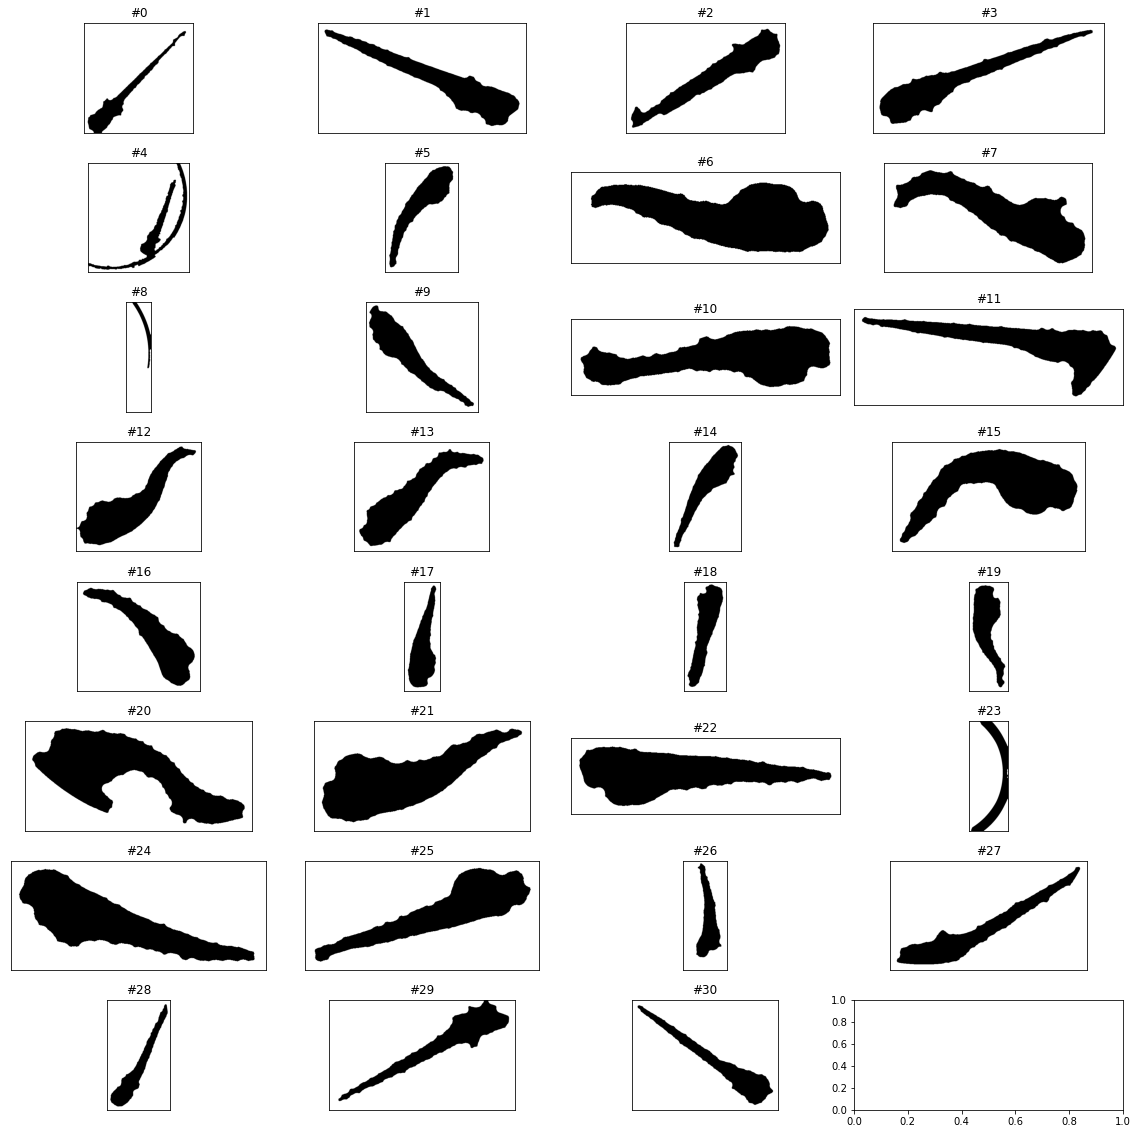

In [25]:
plot_images(list(map(lambda x: (x.fish_props.mask.cropped), fishes)), nums=True)

#0
#1
#2
#3
#4
#5
#6
#7
#8
#9
#10
#11
#12
#13
#14
#15
#16
#17
#18
#19
#20
#21
#22
#23
#24
#25
#26
#27
#28


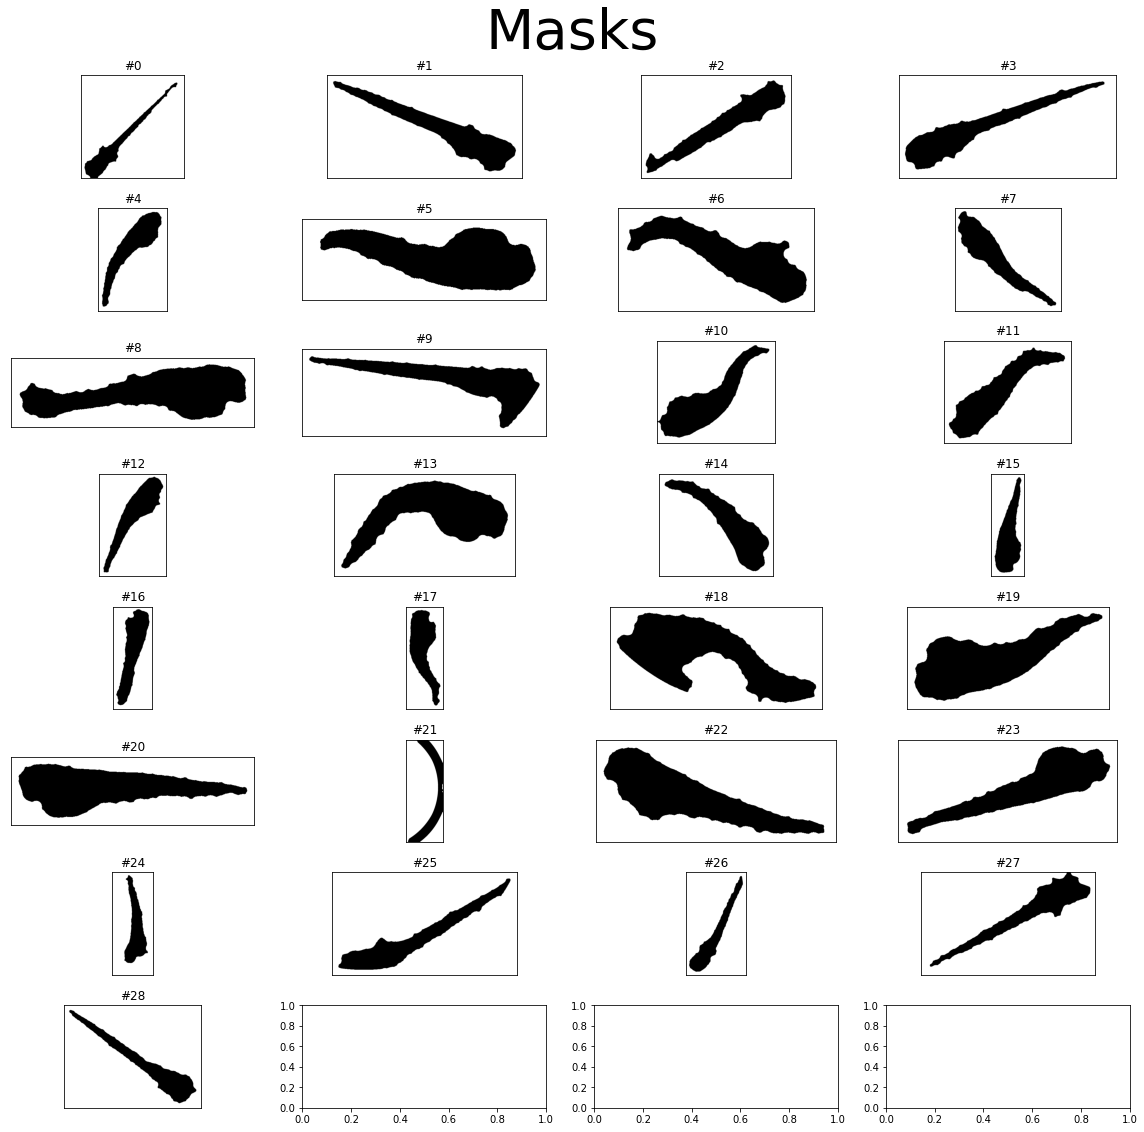

In [26]:
masks = []

for i, fish in enumerate(successful_fishes):
    print(f'#{i}')
    if fish.fish_props.has_fish: masks.append(fish.fish_props.mask.cropped)
plot_images(masks, nums=True, title="Masks")

#0
#1
#2
#3
#4
#5
#6
#7
#8
#9
#10
#11
#12
#13
#14
#15
#16
#17
#18
#19
#20
#21
#22
#23
#24
#25
#26
#27
#28


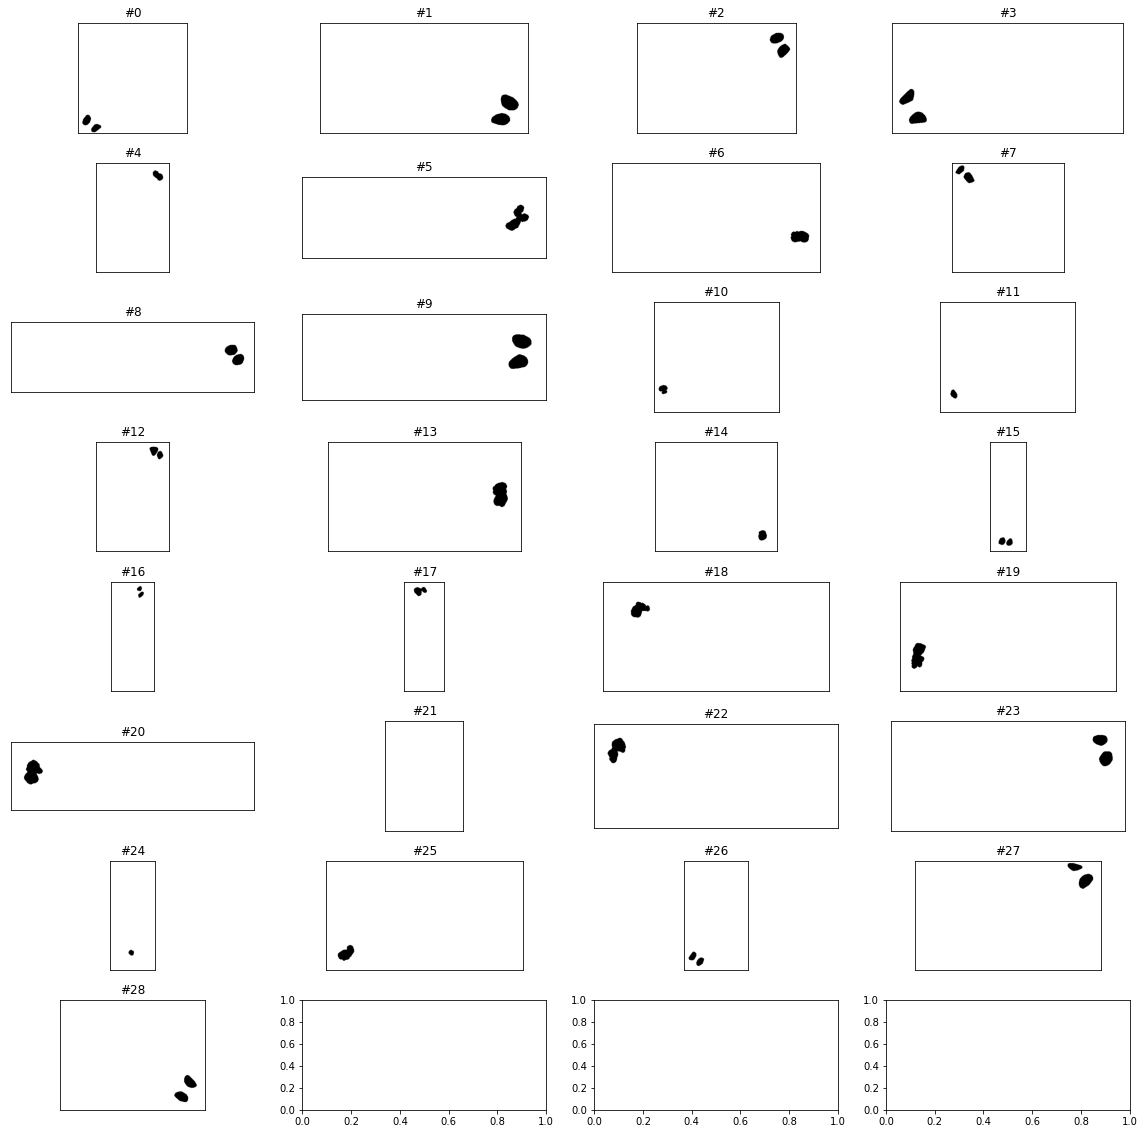

In [27]:
eyes = []

from src.utils import show_img

for i, fish in enumerate(successful_fishes):
    print(f'#{i}')
    eyes.append(fish.fish_props.eyes)

plot_images(eyes, nums=True)

#0
#1
#2
#3
#4
#5
#6
#7
#8
#9
#10
#11
#12
#13
#14
#15
#16
#17
#18
#19
#20
#21
#22
#23
#24
#25
#26
#27
#28


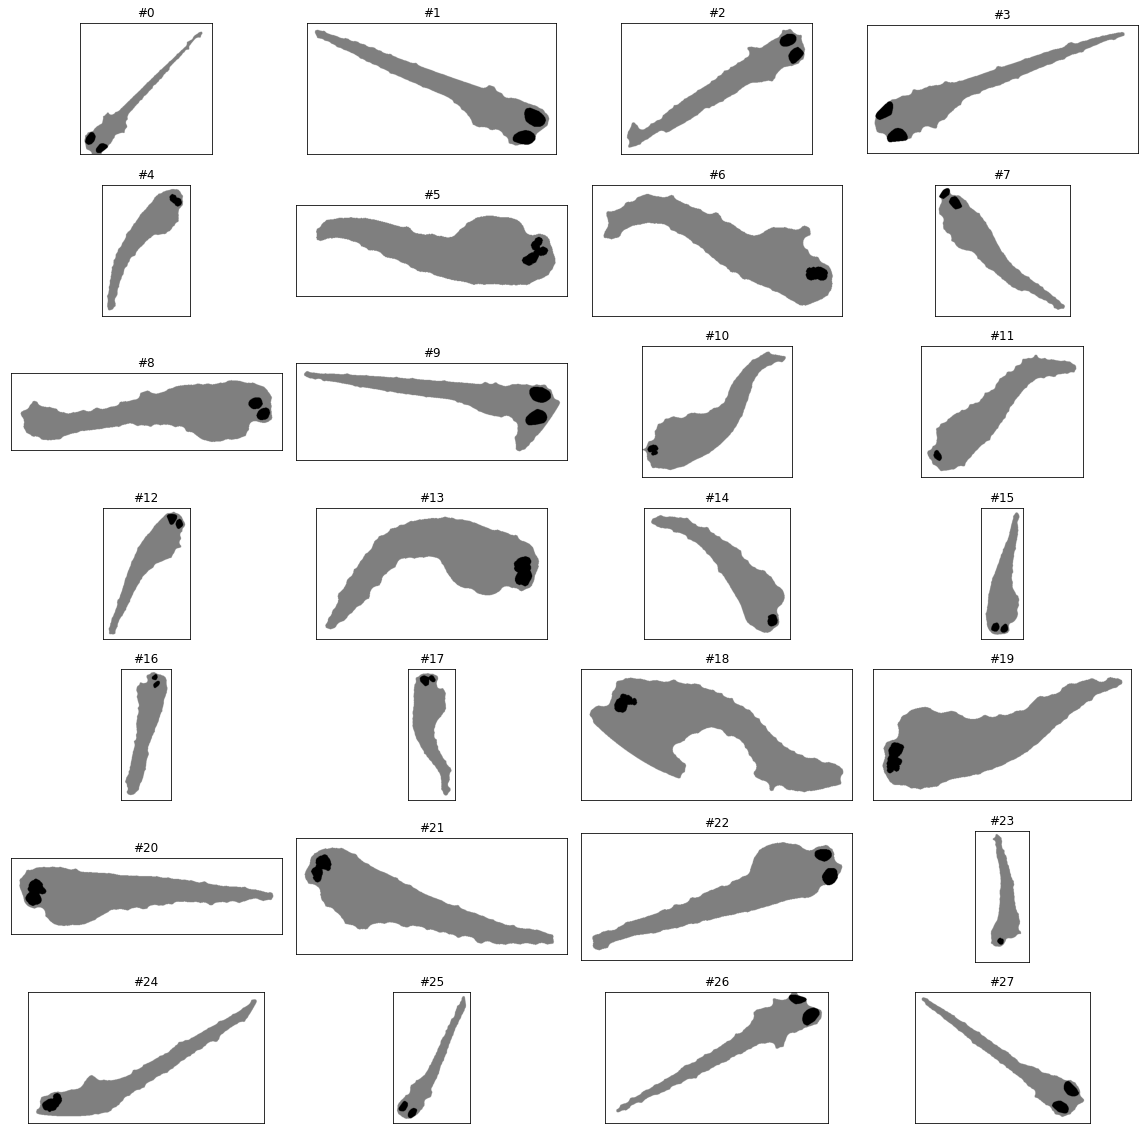

In [28]:
from skimage.morphology import disk, binary_closing

eyes_on_body = []

for i, fish in enumerate(successful_fishes[::]):
    print(f"#{i}")
    if fish.fish_props.has_eyes:
        eyes_on_body.append((fish.fish_props.mask.cropped.astype(float) + fish.fish_props.eyes.astype(float)))
plot_images(eyes_on_body, nums=True)

In [29]:
from skimage.measure import regionprops
from skimage.measure import label

orientations = []
centroids = []

for i, t in enumerate(masks):
    print(f'#{i}')
    o = regionprops(label(masks[i]))[0].orientation
    c = regionprops(label(masks[i]))[0].centroid
    orientations.append(o)
    centroids.append(c)
    print(f'orientation: {o}')
    print(f'centroids: {c}')

#0
orientation: -0.7594170987622756
centroids: (452.85025434257716, 225.41564499871072)
#1
orientation: 1.1532709016865892
centroids: (192.4833566022485, 408.8548509564749)
#2
orientation: -1.0375286908462047
centroids: (208.2374156769596, 366.0289026128266)
#3
orientation: -1.186554928393886
centroids: (178.4286940866916, 246.7230577482343)
#4
orientation: -0.6135780081288146
centroids: (197.63030363713736, 168.48188940899647)
#5
orientation: 1.4473357151857829
centroids: (82.38631215313173, 300.60091743119267)
#6
orientation: 1.2173933290592804
centroids: (131.68409616273695, 305.2457697642164)
#7
orientation: 0.7940653836787906
centroids: (248.39173820283233, 203.795370168159)
#8
orientation: -1.4984394522090538
centroids: (99.59208094706604, 387.16996322251293)
#9
orientation: 1.3935459833301937
centroids: (106.70135080137212, 531.0929087773019)
#10
orientation: -0.8676453604776433
centroids: (242.86838212313782, 194.81295968330033)
#11
orientation: -0.8535865097322269
centroids: (

In [ ]:
from src.utils import get_bounding_box_obj
import numpy as np
from skimage.transform import rotate

rotateds = []
rotated_back = []


def align_to_x_axis(img: np.ndarray, orientation: float, center=(0, 0)):
    angle_in_degrees = orientation * (180 / np.pi) + 90
    return rotate(img, -angle_in_degrees, resize=True, center=center)


def rotate_back(img: np.ndarray, desired_orientation: float, center=(0, 0)):
    angle_in_degrees = desired_orientation * (180 / np.pi) + 90
    return rotate(img, angle_in_degrees, resize=True, center=center)

big_masks = list(map(lambda x: x.fish_props.mask.og, successful_fishes))


for i, a in enumerate(masks):
    print(f'#{i}')
    """    orientation = ori[i]
    angle_in_degrees = orientation * (180 / np.pi) + 90
    rot.append(binary_closing(rotate(a, -angle_in_degrees, resize=True), disk(15)))"""
    print(a.dtype)
    print(a.shape)
    show_img(a)
    rotated = (align_to_x_axis(a, orientations[i]))
    show_img(rotated)
    bbox = get_bounding_box_obj(rotated)
    rotated = bbox.bound_img(rotated)
    rotateds.append(rotated)


for i, a in enumerate(masks):
    back = rotate_back(rotateds[i], orientations[i])
    bbox = get_bounding_box_obj(back)
    back = bbox.bound_img(back)
    rotated_back.append(back)

#0
bool
(663, 666)
#1
bool
(354, 673)
#2
bool
(446, 649)
#3
bool
(335, 708)
#4
bool
(518, 346)
#5
bool
(171, 510)
#6
bool
(279, 531)
#7
bool
(540, 556)
#8
bool
(193, 679)
#9
bool
(293, 822)
#10
bool
(410, 469)
#11
bool
(454, 561)
#12
bool
(595, 393)
#13
bool
(299, 527)
#14
bool
(430, 480)


In [ ]:
plot_images(rotateds, nums=True)

In [ ]:
plot_images(rotated_back, nums=True)

In [ ]:
plot_images(eyes_on_body, nums=True)

In [ ]:
from skimage.color import gray2rgb


def limits_marked(img: np.ndarray) -> np.ndarray:
    img = img.astype(float)
    img = gray2rgb(img)

    left_max, right_max, top_max, bottom_max = get_limits_of_object(img)

    cv2.circle(img, right_max, 1, (255, 255, 255), 10)
    cv2.circle(img, left_max, 1, (255, 255, 255), 10)
    img = rgb2gray(img)

    return img

In [ ]:
from skimage.color import rgb2gray
import cv2
from skimage.morphology import skeletonize

re = []
re_ = []
for i, r in enumerate(rotateds):
    #re.append((limits_marked(r)))
    rb = rotate_back((limits_marked(r)), orientations[i])
    re_.append(rb)
    re.append(binary_dilation(rb, disk(10)).astype(float) + masks[i].astype(float) )
    #re_.append(np.logical_xor((skeletonize(r, method='lee')), (rotateds[i])))
plot_images(re, nums=True)
plot_images(re_)

In [ ]:
def joints(skeleton):
    xx, yy = skeleton.nonzero()
    n = len(xx)

    dist_mat = ((xx[:, None] - xx[None, :]) ** 2 + (yy[:, None] - yy[None, :]) ** 2)
    adj_mat = (dist_mat <= 2).astype(int)
    # joints will have more than 2 neighbors and endpoints
    # will have only one.
    ends = np.where(adj_mat.sum(1) == 1)[0]
    intersections = np.where(adj_mat.sum(1) > 2)[0]
    return intersections




In [ ]:
def get_endpoints_of_skeleton(skeleton: np.ndarray) -> np.ndarray:
    kernel = np.asarray([
        [-1, -1, -1],
        [-1, 2, -1],
        [-1, -1, -1]
    ])
    skeleton = normalize_0_255(skeleton.astype(float)).astype(np.uint8)
    return cv2.filter2D(skeleton, -1, kernel).astype(bool)


In [ ]:
fish = re_[19]
print(fish.shape)

kernel = np.asarray([
    [-1, -1, -1],
    [-1, 2, -1],
    [-1, -1, -1]
])

fish = normalize_0_255(fish.astype(float)).astype(np.uint8)
filtered = cv2.filter2D(fish, -1, kernel).astype(bool)
plt.imshow(binary_dilation(filtered, disk(1)), 'binary')

print(filtered.nonzero())

In [ ]:
fish = successful_fishes[1]
props = regionprops(label(fish.fish_props.mask.cropped))

plt.imshow(fish.fish_props.mask.cropped, 'gray')
plt.xticks([])
plt.yticks([])

In [ ]:
from src.measure import get_limits_of_object


def get_eps(img: np.ndarray):
    og_shape = img.shape
    bbox = get_bounding_box_obj(img)  # bbox to og image
    cropped_img = bbox.bound_img(img)  # crop to bbox

    props = regionprops(label(img))

    rotated = align_to_x_axis(cropped_img, props[0].orientation, props[0].centroid)
    bbox_rot = get_bounding_box_obj(rotated)  # bbox to og image
    rotated = bbox_rot.bound_img(rotated)
    eps = get_limits_of_object(rotated)
    np.zeros_like

    rotated_back = rotate_back(eps, props[0].orientation, props[0].centroid)
    bbox_rot = get_bounding_box_obj(rotated_back)  # bbox to og image
    rotated_back = bbox_rot.bound_img(rotated_back)

    print(rotated.dtype)
    return [cropped_img, rotated, eps, rotated_back]


In [ ]:
plot_images(get_eps(fish.fish_props.mask.cropped))